### Create Captcha

In [ ]:
from captcha.image import ImageCaptcha
import matplotlib . pyplot as plt
import random
import string

characters = string.digits + string.ascii_uppercase
generator = ImageCaptcha()

for _ in range(500000):
    # Generate a random 5 character string
    random_str = ''.join([random.choice(characters) for j in range(5)])

    # Generate verification code
    img = generator.generate_image(random_str)

    # Save verification code
    file_name = '/content/drive/MyDrive/Captcha_Solving/Data/'+random_str+'.jpg'
    img.save(file_name)
print('finish')

### Preprocessing

In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np


In [ ]:
counter = 0

directory_path = 'C:\\Users\\lenovo\\Desktop\\project\\8508\\project\\data\\'

for file_name in tqdm(os.listdir(directory_path)):
    if file_name.endswith('.jpg'):
        image = cv2.imread(os.path.join(directory_path, file_name), 0)
        for i in range(5):
            counter += 1
            sub_image = image[:, i * 28:i * 28 + 35]
            output_directory = 'C:\\Users\\lenovo\\Desktop\\project\\8508\\project\\sub_image\\'
            cv2.imwrite(os.path.join(output_directory, f'{file_name[i]}_{counter}.jpg'), sub_image)


In [3]:
directory_path = 'C:\\Users\\lenovo\\Desktop\\project\\8508\\project\\sub_image\\'

for file_name in tqdm(os.listdir(directory_path)):
    if file_name.endswith('.jpg'):
        sub_image = cv2.imread(os.path.join(directory_path, file_name), 0)
        filtered = cv2.fastNlMeansDenoising(sub_image, None, 31, 7, 21)
        filtered = cv2.medianBlur(filtered, 1)
        output_directory = 'C:\\Users\\lenovo\\Desktop\\project\\8508\\project\\sub_filtered\\'
        cv2.imwrite(os.path.join(output_directory, file_name), filtered)


100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [39:10<00:00, 21.27it/s]


In [5]:
import os
import cv2
from tqdm import tqdm

directory_path = 'C:\\Users\\lenovo\\Desktop\\project\\8508\\project\\sub_category\\'

all_images = []
all_labels = []

for root, dirs, files in tqdm(os.walk(directory_path)):
    for file_name in files:
        if file_name.endswith('.jpg'):
            file_path = os.path.join(root, file_name)
            image = cv2.imread(file_path)
            image = cv2.resize(image, (32, 32))
            image = image.astype(np.float32) / 255.0

            all_images.append(image)
            label = os.path.basename(root)

            all_labels.append(label)


37it [01:26,  2.35s/it]


In [6]:
import numpy as np
import pickle

with open('all_labels.pickle', 'wb') as f:
    pickle.dump(all_labels, f)

In [28]:
import numpy as np
import pickle

all_images = np.array(all_images)

with open('all_images.pickle', 'wb') as f:
    pickle.dump(all_images, f)

In [19]:
import pickle

with open('all_images.pickle', 'rb') as f:
    all_images = pickle.load(f)
with open('all_labels.pickle', 'rb') as f:
    all_labels = pickle.load(f)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
all_labels = lb.fit_transform(all_labels)

trainX , testX , trainy , testy = train_test_split(all_images , all_labels,test_size = 0.2)

# CNN Model

In [31]:
from tensorflow.keras import layers ,models 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D ,GlobalAveragePooling2D 

net = models.Sequential([layers.Conv2D(64 , (3,3) , activation = 'relu',padding = 'same' , input_shape = (32,32,3)),
                       layers.MaxPooling2D((2,2)),
                         
                       layers.Dropout(0.25),
                        
                       layers.Conv2D(128 , (3,3) , activation = 'relu', padding = 'same' ),
                       layers.MaxPooling2D((2,2)),
                         
                        
                       layers.Flatten(),
                        
                       layers.Dense(64, activation = 'relu'),
                       layers.Dense(36 , activation = 'softmax')
                       ])
net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)             

In [32]:
net.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

H = net.fit(x = trainX , y = trainy , epochs = 200  , batch_size = 32 , validation_data = (testX , testy),callbacks=[es])

Epoch 1/200
1625/1625 [==============================] - 154s 94ms/step - loss: 3.0701 - accuracy: 0.1881 - val_loss: 2.5857 - val_accuracy: 0.2946
Epoch 2/200
1625/1625 [==============================] - 151s 93ms/step - loss: 2.2639 - accuracy: 0.3836 - val_loss: 1.9247 - val_accuracy: 0.4877
Epoch 3/200
1625/1625 [==============================] - 164s 101ms/step - loss: 1.8148 - accuracy: 0.5167 - val_loss: 1.6632 - val_accuracy: 0.5748
Epoch 4/200
1625/1625 [==============================] - 152s 93ms/step - loss: 1.6140 - accuracy: 0.5760 - val_loss: 1.5905 - val_accuracy: 0.5880
Epoch 5/200
1625/1625 [==============================] - 149s 92ms/step - loss: 1.4988 - accuracy: 0.6077 - val_loss: 1.4696 - val_accuracy: 0.6270
Epoch 6/200
1625/1625 [==============================] - 145s 89ms/step - loss: 1.4166 - accuracy: 0.6313 - val_loss: 1.4779 - val_accuracy: 0.6324
Epoch 7/200
1625/1625 [==============================] - 145s 89ms/step - loss: 1.3528 - accuracy: 0.6496 - val

In [34]:
net.save('model_2023_04_09')

INFO:tensorflow:Assets written to: model_2023_04_09\assets


INFO:tensorflow:Assets written to: model_2023_04_09\assets


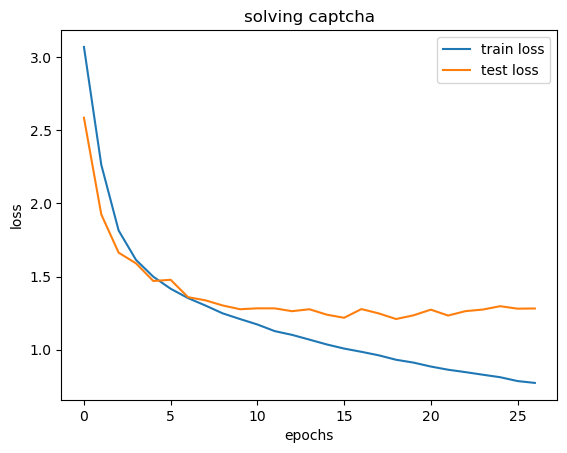

In [36]:
import matplotlib.pyplot as plt

plt.plot(H.history['loss'], label = 'train loss')
plt.plot(H.history['val_loss'], label = 'test loss')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('solving captcha')
plt.show()

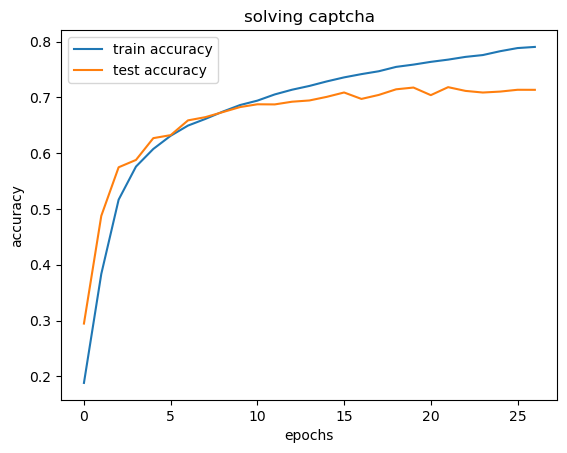

In [37]:
plt.plot(H.history['accuracy'] , label = 'train accuracy')
plt.plot(H.history['val_accuracy'] , label = 'test accuracy')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('solving captcha')
plt.show()

# VGG16

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [8]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=trainX[0].shape)
base_model.trainable = False ## Not trainable weights

In [9]:
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [11]:
from tensorflow.keras import layers ,models 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D ,GlobalAveragePooling2D 

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(64, activation='relu')
prediction_layer = layers.Dense(36, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 36)                2340      
                                                                 
Total params: 14,790,948
Trainable params: 76,260
Non-trainable params: 14,714,688
_________________________________________________________________


In [73]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.compile(optimizer = 'sgd',loss='categorical_crossentropy', metrics=['accuracy'])
    
H = model.fit(x = trainX , y = trainy , epochs = 20  , batch_size = 32 , validation_data = (testX , testy),callbacks=[es])

Epoch 1/20
375/375 [==============================] - 88s 234ms/step - loss: 3.4256 - accuracy: 0.1061 - val_loss: 3.3408 - val_accuracy: 0.1138
Epoch 2/20
375/375 [==============================] - 93s 248ms/step - loss: 3.2593 - accuracy: 0.1398 - val_loss: 3.1885 - val_accuracy: 0.1615
Epoch 3/20
375/375 [==============================] - 84s 224ms/step - loss: 3.0998 - accuracy: 0.1737 - val_loss: 3.0622 - val_accuracy: 0.1806
Epoch 4/20
375/375 [==============================] - 87s 233ms/step - loss: 2.9528 - accuracy: 0.1994 - val_loss: 2.9140 - val_accuracy: 0.2043
Epoch 5/20
375/375 [==============================] - 87s 233ms/step - loss: 2.8315 - accuracy: 0.2212 - val_loss: 2.7978 - val_accuracy: 0.2233
Epoch 6/20
375/375 [==============================] - 82s 219ms/step - loss: 2.7360 - accuracy: 0.2442 - val_loss: 2.8152 - val_accuracy: 0.2190
Epoch 7/20
375/375 [==============================] - 92s 244ms/step - loss: 2.6662 - accuracy: 0.2621 - val_loss: 2.6872 - val_ac

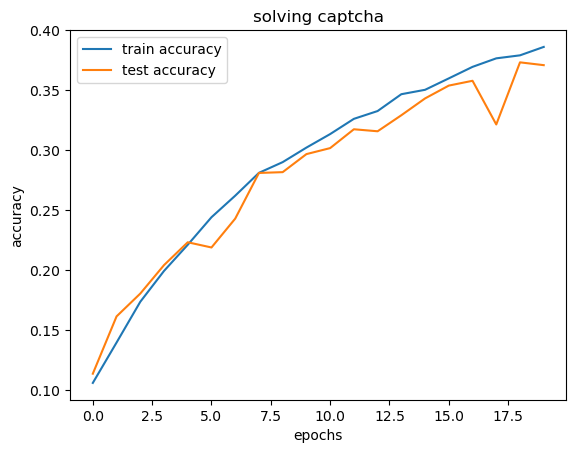

In [74]:
plt.plot(H.history['accuracy'] , label = 'train accuracy')
plt.plot(H.history['val_accuracy'] , label = 'test accuracy')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('solving captcha')
plt.show()

# ResNet50

In [75]:
from tensorflow import keras
import tensorflow as tf

resnet_model1 = keras.Sequential()

pretrained_model1= tf.keras.applications.ResNet50(include_top=False,
                   input_shape = (32,32,3),
                   pooling='avg',classes=25,
                   weights='imagenet')

for layer in pretrained_model1.layers:
        layer.trainable=False

resnet_model1.add(pretrained_model1)

94765736/94765736 [==============================] - 14s 0us/step


In [79]:
resnet_model1.add(tf.keras.layers.Flatten())
resnet_model1.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model1.add(tf.keras.layers.Dense(36, activation='softmax'))

In [80]:
resnet_model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dense_13 (Dense)            (None, 25)                12825     
                                                                 
 flatten_6 (Flatten)         (None, 25)                0         
                                                                 
 dense_14 (Dense)            (None, 512)               13312     
                                                                 
 dense_15 (Dense)            (None, 36)               

In [81]:
resnet_model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model1.fit(x = trainX , y = trainy , epochs = 20  , batch_size = 32 , validation_data = (testX , testy))

Epoch 1/20
375/375 [==============================] - 72s 176ms/step - loss: 3.4828 - accuracy: 0.0974 - val_loss: 3.4750 - val_accuracy: 0.0995
Epoch 2/20
375/375 [==============================] - 67s 179ms/step - loss: 3.4765 - accuracy: 0.0975 - val_loss: 3.4727 - val_accuracy: 0.0995
Epoch 3/20
375/375 [==============================] - 65s 173ms/step - loss: 3.4746 - accuracy: 0.0975 - val_loss: 3.4730 - val_accuracy: 0.0995
Epoch 4/20
375/375 [==============================] - 65s 173ms/step - loss: 3.4754 - accuracy: 0.0975 - val_loss: 3.4722 - val_accuracy: 0.0995
Epoch 5/20
375/375 [==============================] - 68s 181ms/step - loss: 3.4746 - accuracy: 0.0975 - val_loss: 3.4735 - val_accuracy: 0.0995
Epoch 6/20
375/375 [==============================] - 70s 188ms/step - loss: 3.4744 - accuracy: 0.0975 - val_loss: 3.4724 - val_accuracy: 0.0995
Epoch 7/20
375/375 [==============================] - 67s 179ms/step - loss: 3.4741 - accuracy: 0.0975 - val_loss: 3.4719 - val_ac

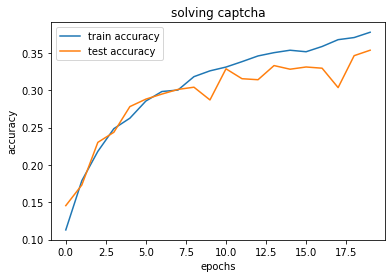

In [19]:
plt.plot(history.history['accuracy'] , label = 'train accuracy')
plt.plot(history.history['val_accuracy'] , label = 'test accuracy')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('solving captcha')
plt.show()

# Test by new images

In [11]:
import os
import cv2
from tqdm import tqdm

counter = 0

directory_path = 'C:\\Users\\lenovo\\Desktop\\project\\8508\\project\\test\\'

for file_name in tqdm(os.listdir(directory_path)):
    if file_name.endswith('.jpg'):
        image = cv2.imread(os.path.join(directory_path, file_name), 0)
        for i in range(5):
            counter += 1
            sub_image = image[:, i * 28:i * 28 + 35]
            output_directory = 'C:\\Users\\lenovo\\Desktop\\project\\8508\\project\\test\\sub_image\\'
            cv2.imwrite(os.path.join(output_directory, f'{file_name[i]}_{counter}.jpg'), sub_image)


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 15.88it/s]


In [56]:
import os
import cv2
import numpy as np
directory_path = 'C:\\Users\\lenovo\\Desktop\\project\\8508\\project\\test\\sub_category\\'

all_images_new = []
all_labels_new = []

for root, dirs, files in (os.walk(directory_path)):
    for file_name in files:
        if file_name.endswith('.jpg'):
            file_path = os.path.join(root, file_name)
            image = cv2.imread(file_path)
            image = cv2.resize(image, (32, 32))
            image = image.astype(np.float32) / 255.0

            all_images_new.append(image)
            label = os.path.basename(root)

            all_labels_new.append(label)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

all_images_new = np.array(all_images_new)
    
lb = LabelBinarizer()
all_labels_new = lb.fit_transform(all_labels_new)

trainX_new , testX_new , trainy_new , testy_new = train_test_split(all_images_new , all_labels_new, test_size = 0.2)

In [61]:
from tensorflow import keras
net = keras.models.load_model('model_2023_04_09')
for l in net.layers[:-1]:
    l.trainable = False

In [62]:
net.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [63]:
net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)             

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(mode='max', patience=5,  restore_best_weights=True)

H = net.fit(x = trainX_new , y = trainy_new , epochs = 200  , batch_size = 32)

Epoch 1/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0304 - accuracy: 1.0000
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0537 - accuracy: 0.9875
Epoch 3/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0398 - accuracy: 1.0000
Epoch 5/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0412 - accuracy: 1.0000
Epoch 6/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0441 - accuracy: 1.0000
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 1.0000
Epoch 8/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0307 - accuracy: 1.0000
Epoch 9/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0399 - accuracy: 1.0000
Epoch 10/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0394 - accuracy: 0.9875
Epoch 11/200
3/3 [=

3/3 [==============================] - 0s 18ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 84/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0231 - accuracy: 1.0000
Epoch 85/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0330 - accuracy: 1.0000
Epoch 86/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 1.0000
Epoch 87/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0552 - accuracy: 0.9875
Epoch 88/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0513 - accuracy: 0.9875
Epoch 89/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 90/200
3/3 [==============================] - 0s 17ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 91/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0487 - accuracy: 1.0000
Epoch 92/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0462 - accuracy: 0.9875
Epoch 93/200
3/3 [=====

3/3 [==============================] - 0s 15ms/step - loss: 0.0482 - accuracy: 0.9875
Epoch 166/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 167/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 168/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0487 - accuracy: 0.9750
Epoch 169/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0337 - accuracy: 1.0000
Epoch 170/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0265 - accuracy: 1.0000
Epoch 171/200
3/3 [==============================] - 0s 15ms/step - loss: 0.0539 - accuracy: 0.9875
Epoch 172/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 173/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0396 - accuracy: 0.9875
Epoch 174/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 175/200


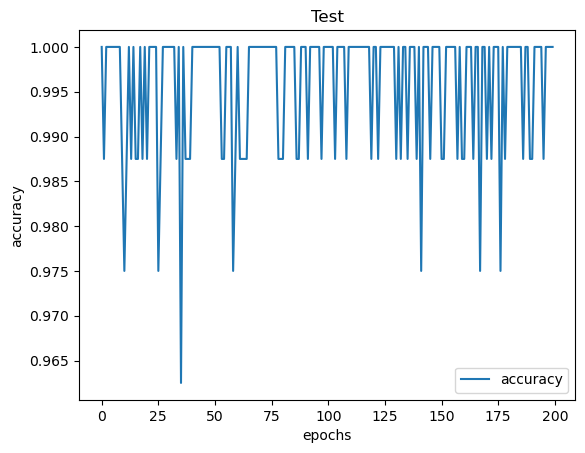

In [76]:
plt.plot(H.history['accuracy'] , label = 'accuracy')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Test')
plt.show()